In [41]:
import numpy as np

In [42]:
class LinearRegression:
    
    def __init__(self, lr=0.001, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        self.bias = None
        self.weights = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights, self.bias = np.zeros(n_features), 0
        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (2/n_samples)*np.dot(X.T, (y_pred-y))
            db = (2/n_samples)*np.sum(y_pred-y)
            self.weights = self.weights - dw*self.lr
            self.bias = self.bias - db*self.lr
        
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [44]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=69)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

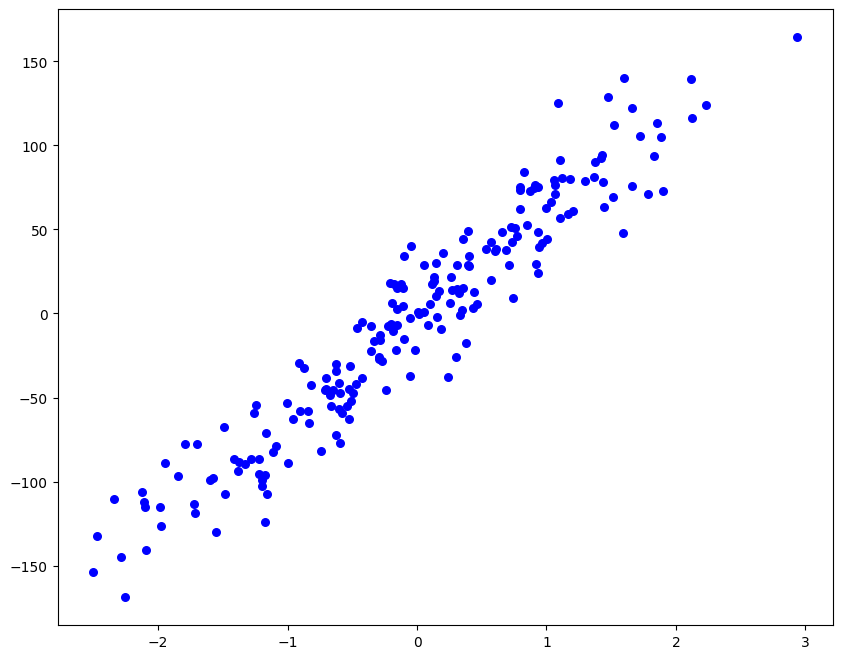

In [46]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:,0], y, color="b", marker="o", s=30)

In [47]:
lin_reg = LinearRegression(lr=0.1)

In [48]:
lin_reg.fit(X_train, y_train)

In [49]:
predictions = lin_reg.predict(X_test)

In [50]:
def mse(y_test, preds):
    return np.mean((y_test-preds)**2)

In [51]:
mse(y_test, predictions)

437.9837408814642

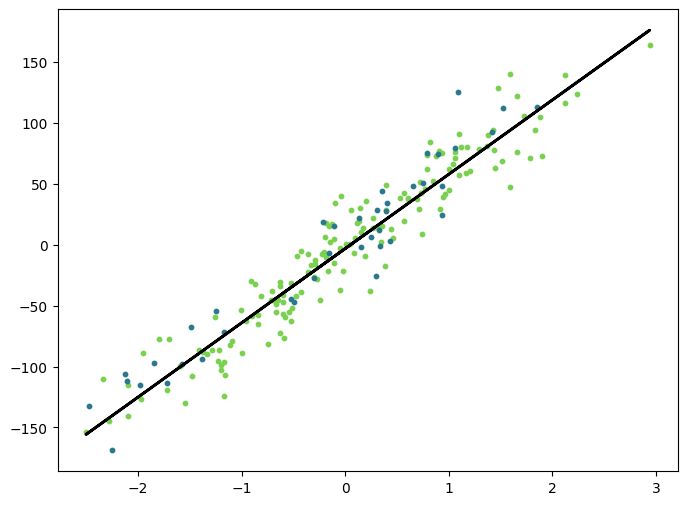

In [52]:
y_pred_line = lin_reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.8), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.4), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Predict")